# End to end model development and deployment

Diabetes is a chronic disease that affects millions worldwide.
Perticularly we are intrested to analyse diabetes in female patients.

**Problem Statement**
Develop a ML model to predict diabetes in women and deploy it as a wew app in StreamLit

**Dataset Description**
This is Pima Indians Dataset from Kaggle and has data about 768 women of Pima heritage 21 years and above.
The dataset is open source

**Steps**
1. Import Libraries
2. Do sanity Check on data
3. Clean data
4. EDA
5. Preprocess data
6. Fit and evaluate models
7. Optimize the best models
8. interpret the models
9. prepare for deployment for creating the data
10. Deploy in Streamlit

In [4]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.5/7.5 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 190.0/190.0 kB ? eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 8.9 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 10.7 MB/s eta 0:00:00
     ------------------------------------- 239.8/239.8 kB 14.3 MB/s eta 0:00:00
     ------------------------------------- 520.6/520.6 kB 16.5 MB/s eta 0:00:00
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
     ---------------------------------------- 87.5/87.5 kB ? eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 12.3 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart th

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

import shap
import pickle
import streamlit as st
from sklearn.pipeline import Pipeline

In [18]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Tested_Positive


In [8]:
data_shape = df.shape
print('Rows = ' + str(data_shape[0]), 'Cols = ' + str(data_shape[1]))

Rows = 768 Cols = 9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
df.describe(include='object')

,Outcome
count,768
unique,4
top,No
freq,470


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# look for corrupt chars
df[~df.applymap(np.isreal).any(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Data Summary**
1. Rows = 768 cols = 9
2. There are 8 numeric vars(features) and 1 cat col(target)
3. No missing values
4. There are no corrupt charecters
5. There are cols with min value 0, which is not possible. These have to be imputed using median.

# Data cleaning

In [19]:
data = df.copy()

In [20]:
df['Outcome'] = df['Outcome'].map({'Yes':1,'Tested_Positive':1,'Tested_Negative':0,'No':0})

In [21]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zerofill = lambda x: x.replace(0, x.median())
df[cols] = df[cols].apply(zerofill)

In [22]:
# min values
print(df[df.columns[:]].min())

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64


# EDA

In [34]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of Pregnancies
----------------------------------------------------------------------------
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

 Skewness of Pregnancies
----------------------------------------------------------------------------
0.9017

 Histogram and Boxplot of Pregnancies
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


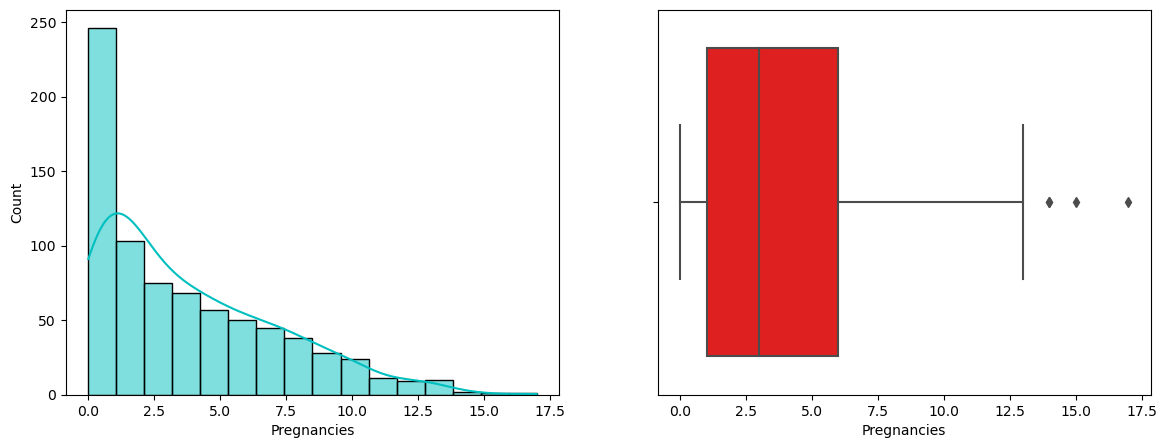

Description of Glucose
----------------------------------------------------------------------------
count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

 Skewness of Glucose
----------------------------------------------------------------------------
0.5356

 Histogram and Boxplot of Glucose
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


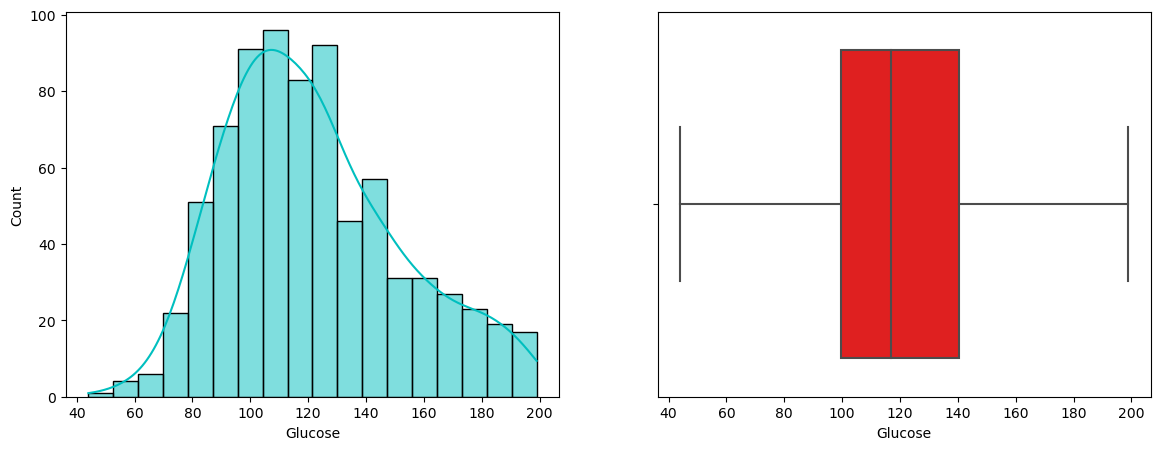

Description of BloodPressure
----------------------------------------------------------------------------
count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

 Skewness of BloodPressure
----------------------------------------------------------------------------
0.1419

 Histogram and Boxplot of BloodPressure
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


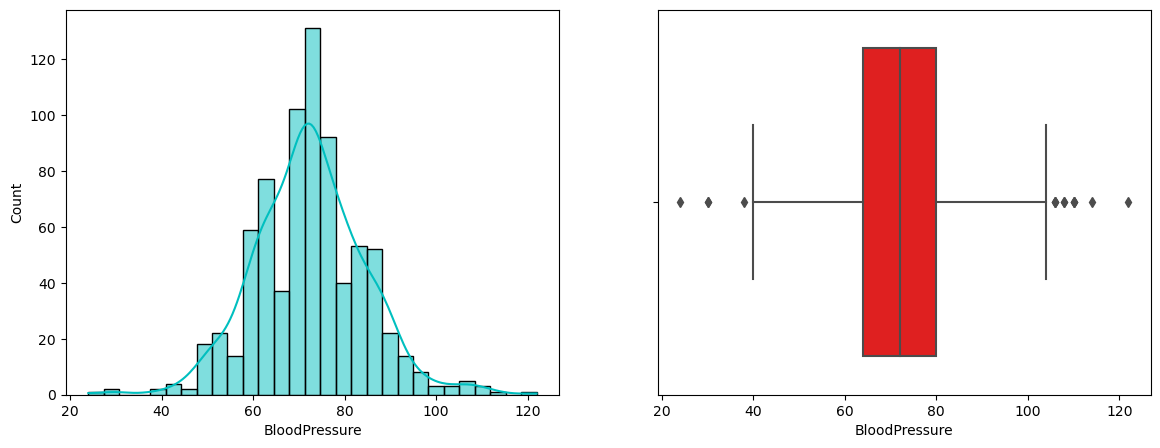

Description of SkinThickness
----------------------------------------------------------------------------
count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

 Skewness of SkinThickness
----------------------------------------------------------------------------
1.2231

 Histogram and Boxplot of SkinThickness
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


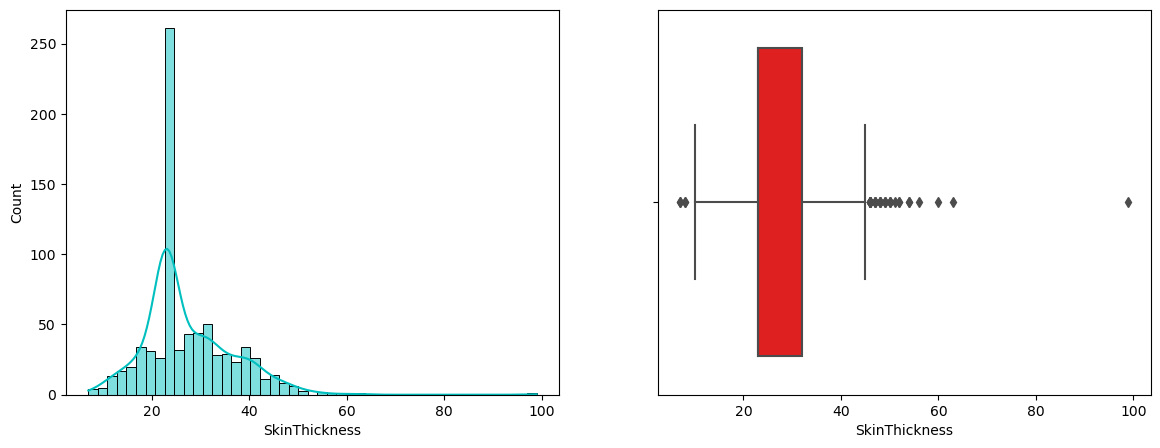

Description of Insulin
----------------------------------------------------------------------------
count    768.000000
mean      94.652344
std      105.547598
min       14.000000
25%       30.500000
50%       31.250000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

 Skewness of Insulin
----------------------------------------------------------------------------
2.6932

 Histogram and Boxplot of Insulin
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


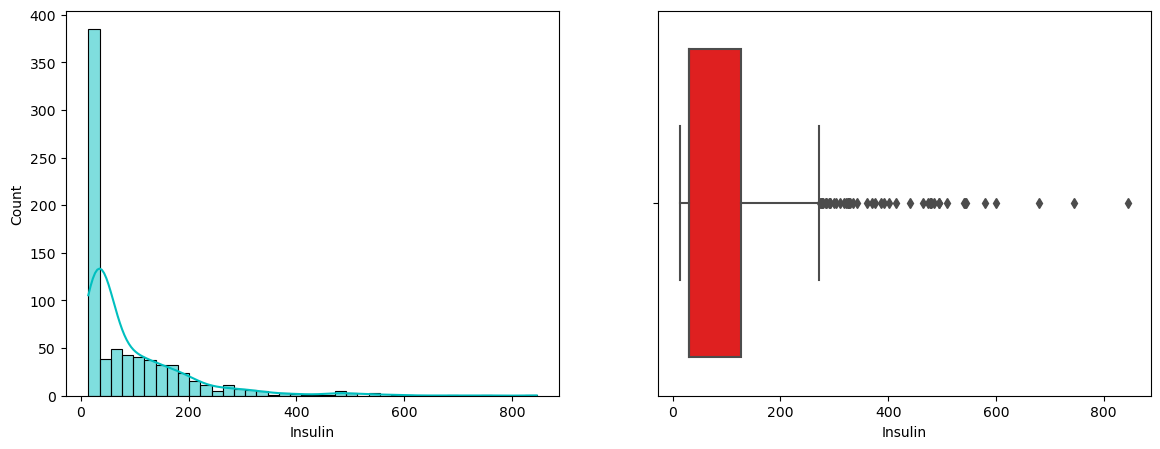

Description of BMI
----------------------------------------------------------------------------
count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

 Skewness of BMI
----------------------------------------------------------------------------
0.6011

 Histogram and Boxplot of BMI
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


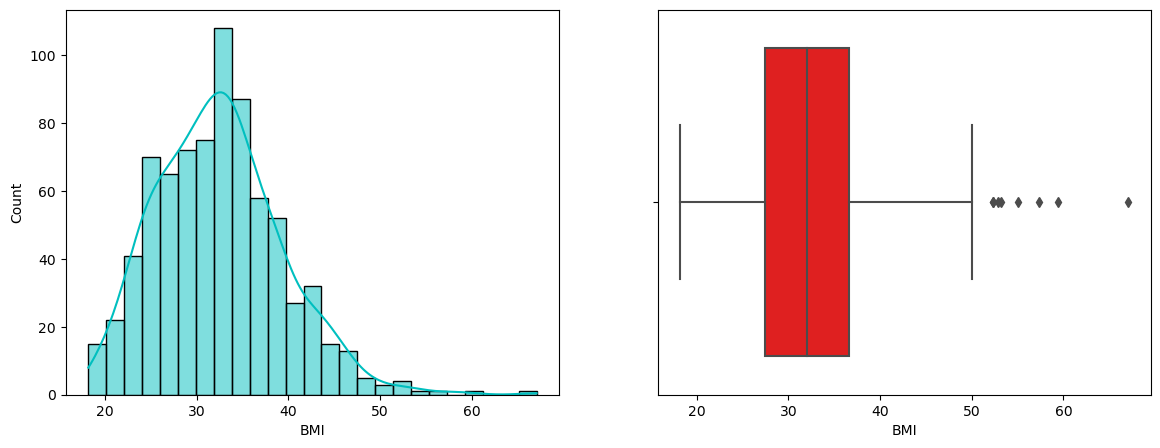

Description of DiabetesPedigreeFunction
----------------------------------------------------------------------------
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

 Skewness of DiabetesPedigreeFunction
----------------------------------------------------------------------------
1.9199

 Histogram and Boxplot of DiabetesPedigreeFunction
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


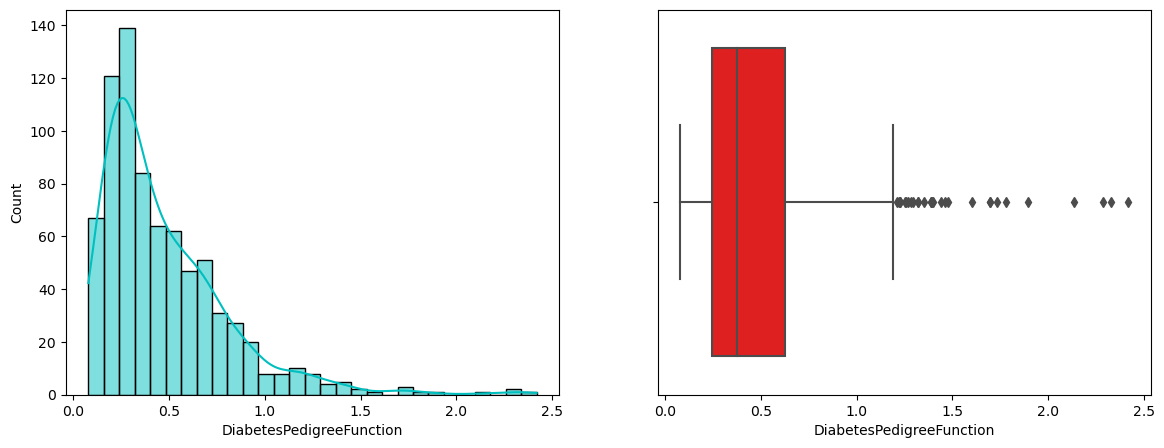

Description of Age
----------------------------------------------------------------------------
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

 Skewness of Age
----------------------------------------------------------------------------
1.1296

 Histogram and Boxplot of Age
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


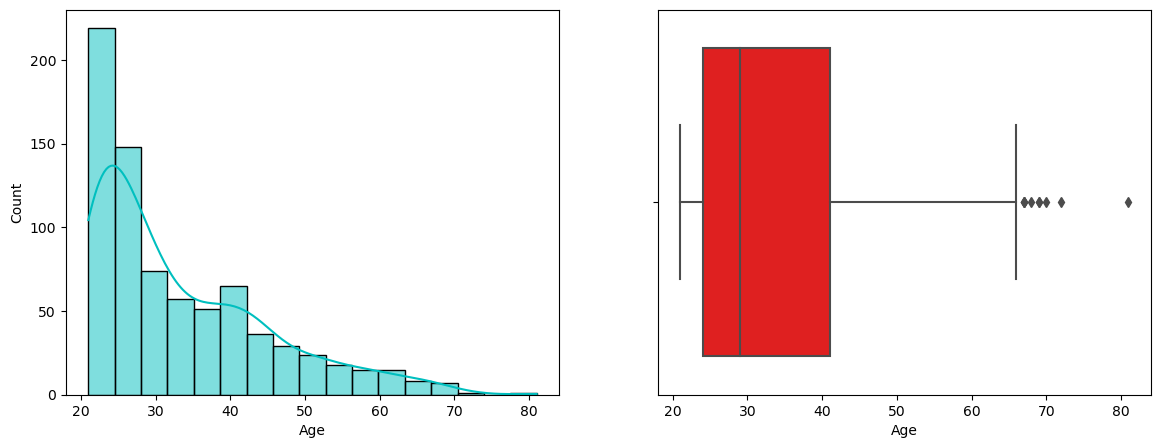

In [42]:
for i in df.columns[0:-1]:
    univariateAnalysis_numeric(i)

**Observations**
1. some are right skewd
2. There are outliers

In [40]:
num_outliers = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    num_outliers[col] = len(df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))])
num_outliers 

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 35,
 'Insulin': 49,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

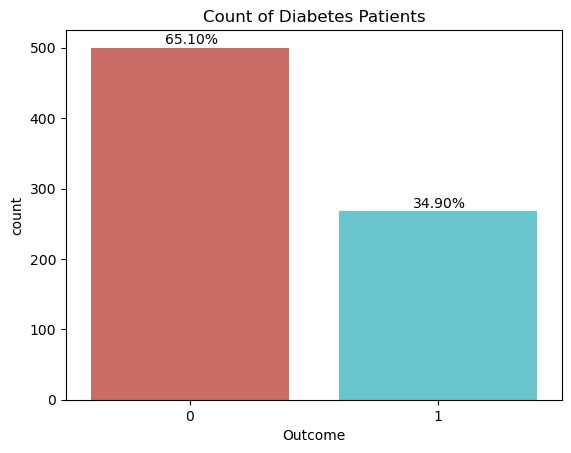

In [54]:
# target
ax = sns.countplot(x='Outcome', data=df ,palette='hls')
for p in ax.patches:
    ax.annotate(format(p.get_height()/len(df)*100, '.2f')+'%', (p.get_x()+0.3, p.get_height()+5))
    ax.set_title('Count of Diabetes Patients')
plt.show()

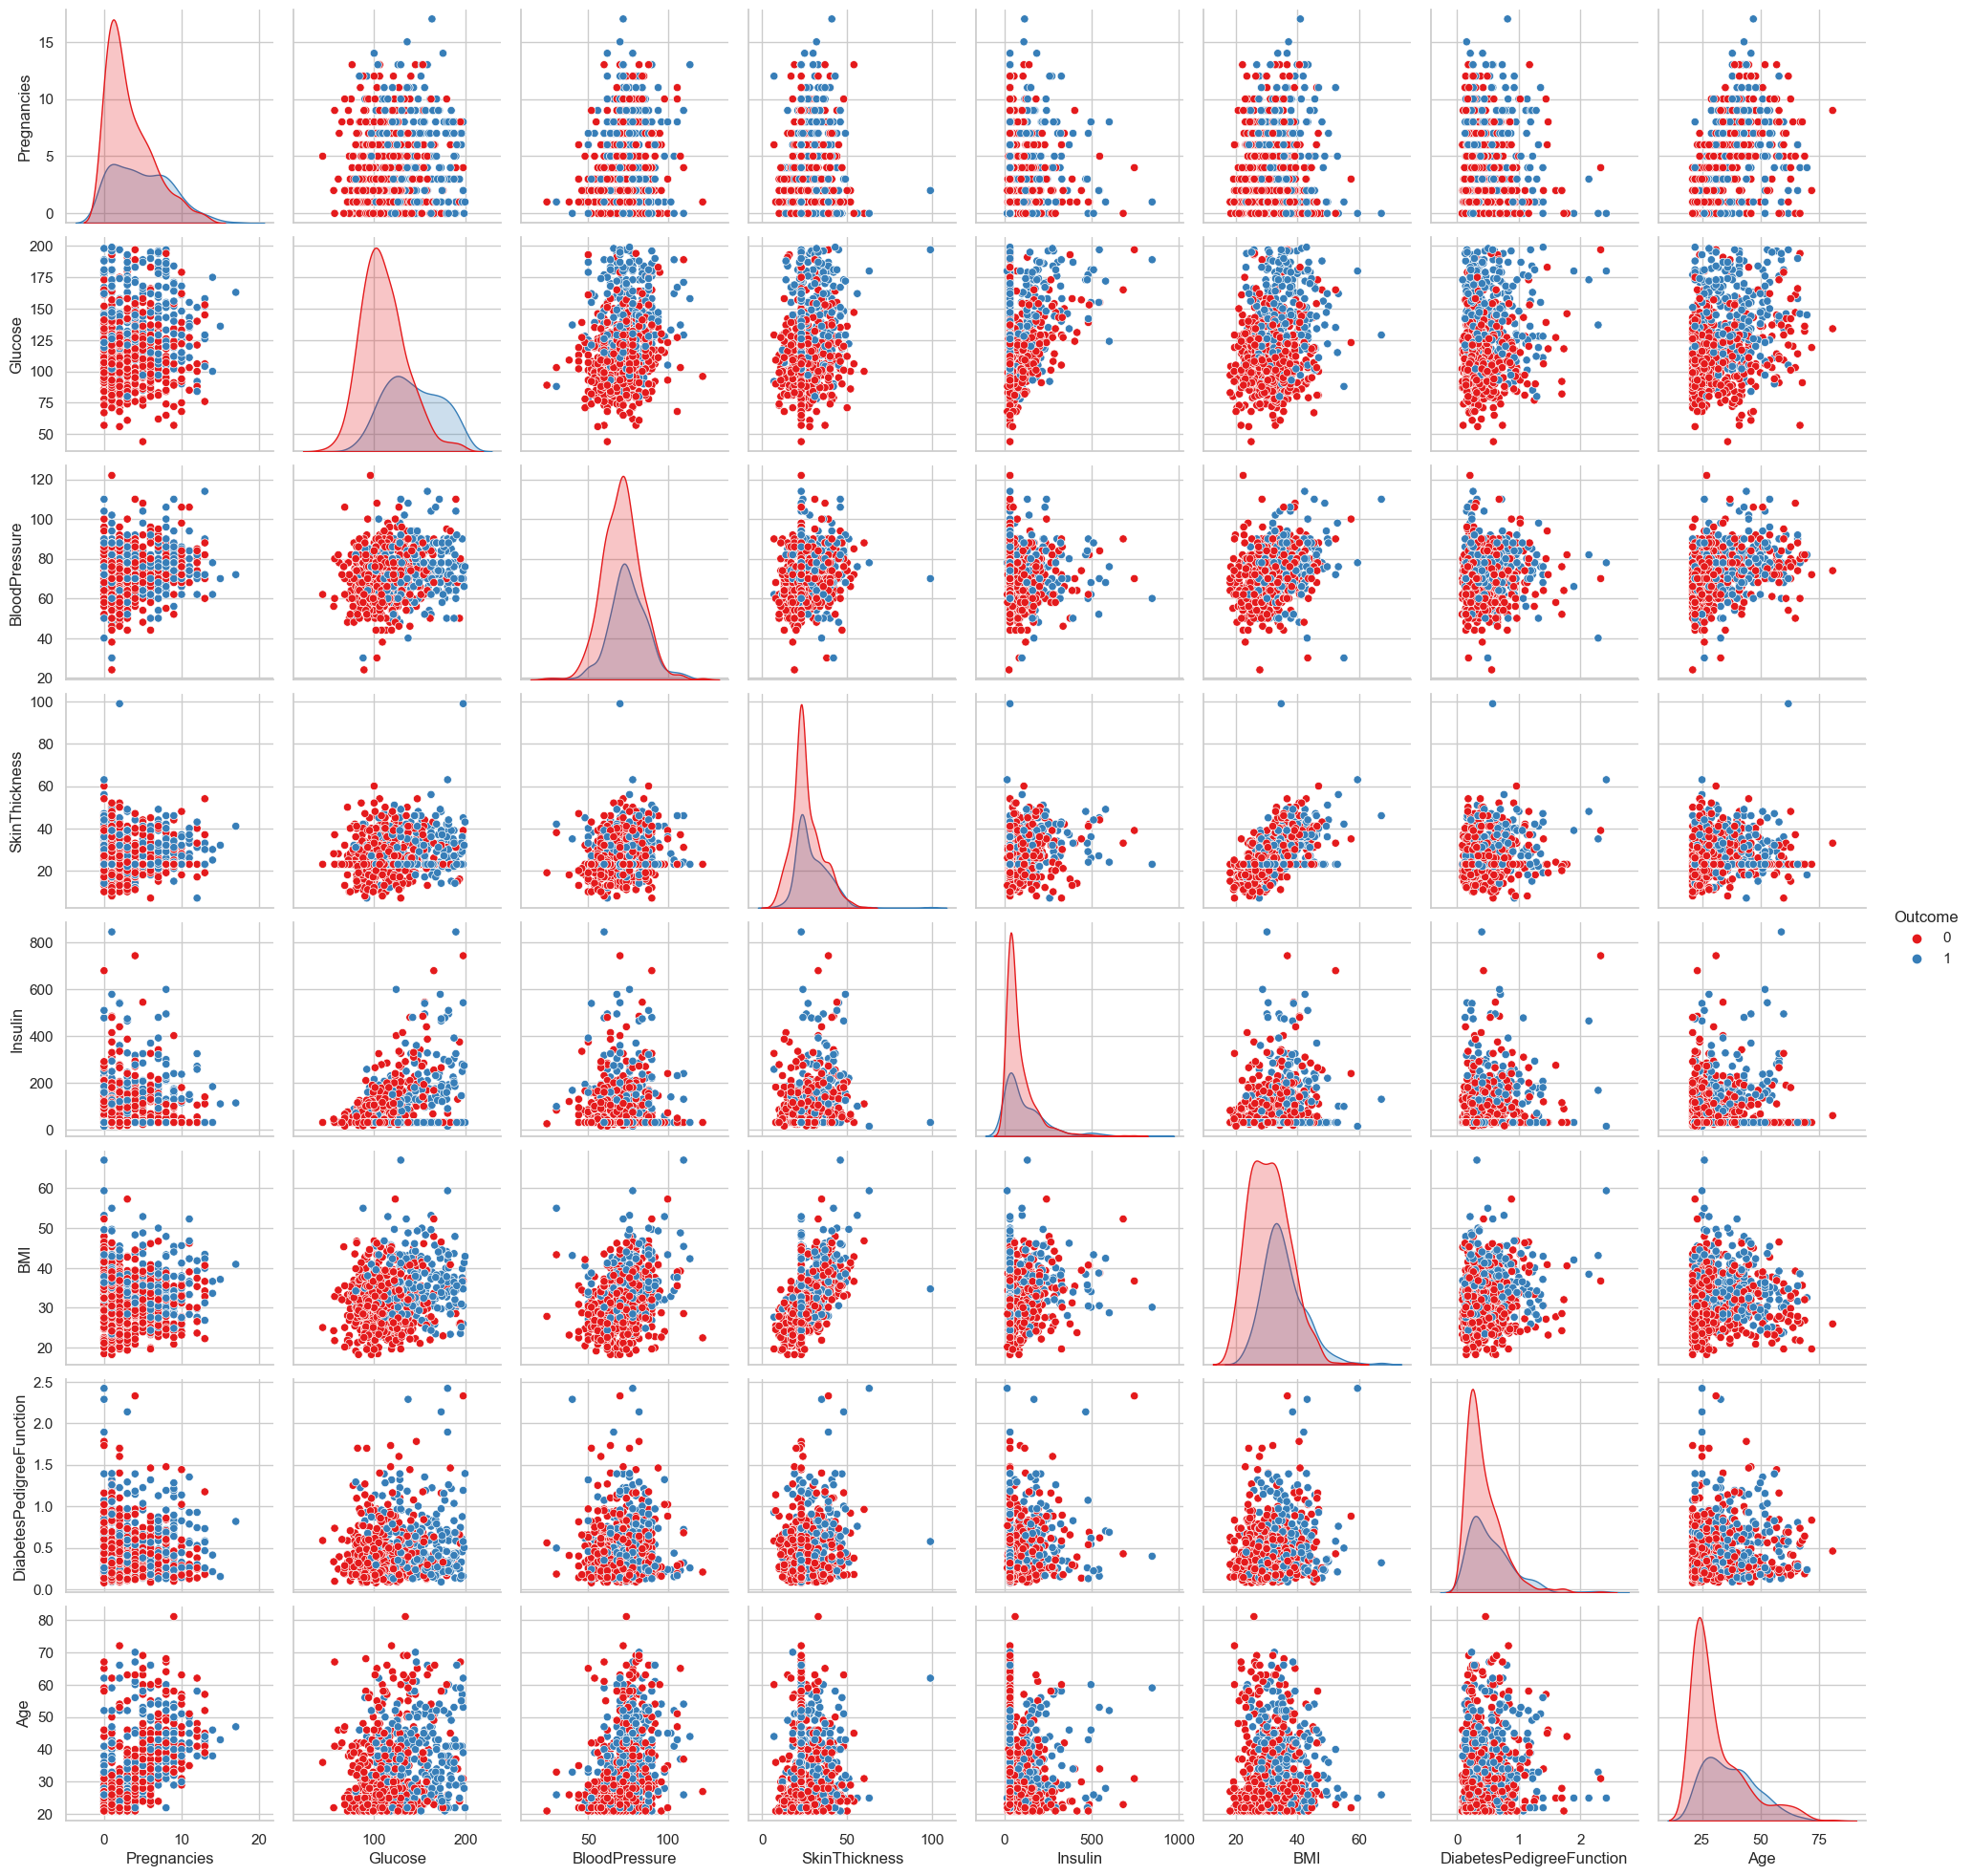

In [67]:
# Bi-Variate analyses
sns.pairplot(df, hue='Outcome')

<AxesSubplot:>

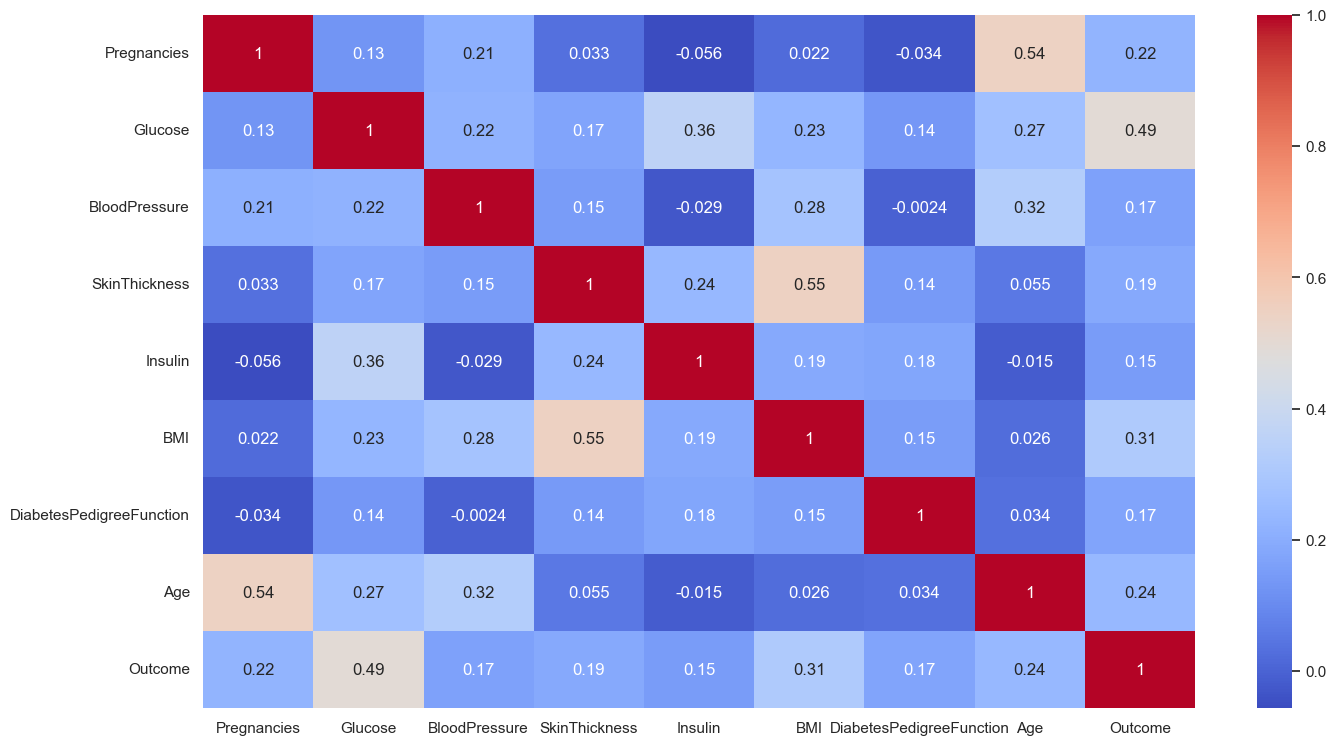

In [71]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

# Model Building

In [121]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
sm = SMOTE()
X, y = sm.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
# scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [92]:
def per_measures(model,test,pred):


  accuracy    = accuracy_score(test,pred)
  f1score     = f1_score(test,pred)
  recall      = recall_score(test,pred)
  precision   = precision_score(test,pred)



  return (accuracy,recall,precision,f1score)

In [95]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [96]:

def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [80]:
# create metrics function
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
def get_metrics(y_true, y_pred):
    # calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    auc  = roc_auc_score(y_true, y_pred)
    print('Accuracy: %.3f' % accuracy)
    print('Recall: %.3f' % recall)
    print('Precision: %.3f' % precision)
    print('F1: %.3f' % f1)
    print(sns.heatmap(matrix, annot=True, fmt='d'))

Accuracy: 0.785
Recall: 0.870
Precision: 0.744
F1: 0.802
AxesSubplot(0.125,0.11;0.62x0.77)


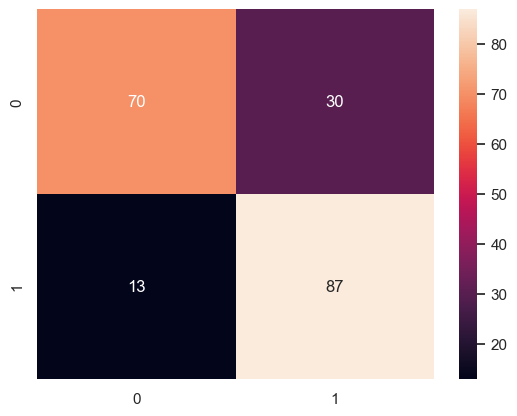

In [81]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
get_metrics(y_test, y_pred)

In [82]:
# optimize the the knn model by drawing model complexity curve
from sklearn.neighbors import KNeighborsClassifier
neighbours = np.arange(1, 12)
train_accuracies = np.empty(len(neighbours))
test_accuracies = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracies[i] = knn.score(x_train, y_train)
    test_accuracies[i] = knn.score(x_test, y_test)


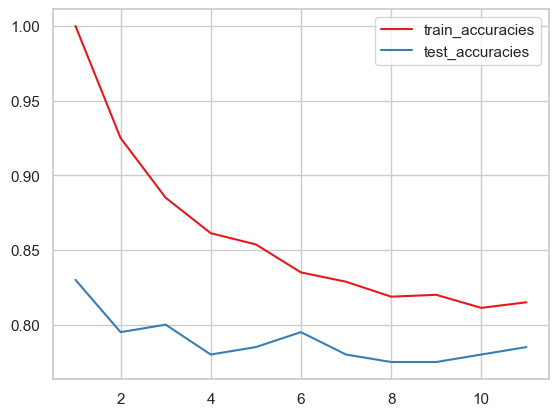

In [85]:
plt.plot(neighbours, train_accuracies,label='train_accuracies')
plt.plot(neighbours, test_accuracies,label='test_accuracies')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.79      0.81      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



In [90]:
cls = {
    'logreg' : LogisticRegression(),
    'Gaissian Nb': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Gboosting' : GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'XGBoost' : XGBClassifier(),
}

In [97]:
for clf, clf_name in list(zip(cls.values(), cls.keys())):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    update_performance(clf_name,clf,y_test,y_pred)

In [98]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,logreg,0.745,0.75,0.742574,0.746269
1,Gaissian Nb,0.720,0.70,0.729167,0.714286
2,KNN,0.785,0.87,0.743590,0.801843
3,Decision Tree,0.760,0.79,0.745283,0.766990
4,Random Forest,0.830,0.89,0.794643,0.839623
5,SVM,0.805,0.83,0.790476,0.809756
6,Gboosting,0.790,0.83,0.768519,0.798077
7,AdaBoost,0.785,0.79,0.782178,0.786070
8,XGBoost,0.805,0.84,0.785047,0.811594


Random Forest came out the best

Accuracy: 0.830
Recall: 0.890
Precision: 0.795
F1: 0.840
AxesSubplot(0.125,0.11;0.62x0.77)


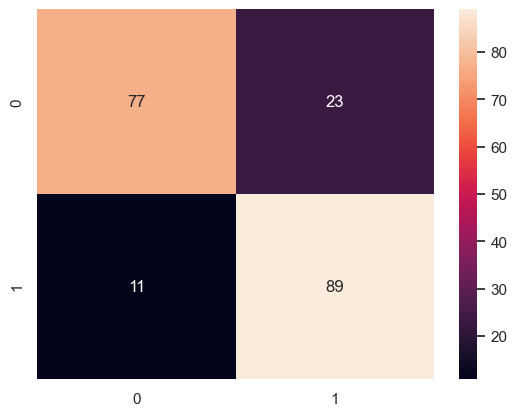

In [99]:
# fit rfc to the data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
get_metrics(y_test, y_pred)


In [101]:
# check if model is overfitting
print('Train Accuracy')
print(rfc.score(x_train,y_train))
print('Test Accuracy')
print(rfc.score(x_test,y_test))

Train Accuracy
1.0
Test Accuracy
0.83


In [102]:
# randomized search
from sklearn.model_selection import RandomizedSearchCV
param_dict = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(1, 10, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
rfc = RandomizedSearchCV(estimator=rf, param_distributions=param_dict, cv=10, random_state=42, n_jobs=-1, n_iter=100,scoring='f1')
rfc.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(10, 100, 10)},
                   random_state=42, scoring='f1')

In [103]:
rfc.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=30)

In [104]:
rfc.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

In [105]:
rfc.best_score_

0.8124148006158232

In [106]:
# check if model is overfitting
print('Train Accuracy')
print(rfc.score(x_train,y_train))
print('Test Accuracy')
print(rfc.score(x_test,y_test))

Train Accuracy
0.9715698393077874
Test Accuracy
0.839622641509434


Accuracy: 0.790
Recall: 0.850
Precision: 0.759
F1: 0.802
AxesSubplot(0.125,0.11;0.62x0.77)


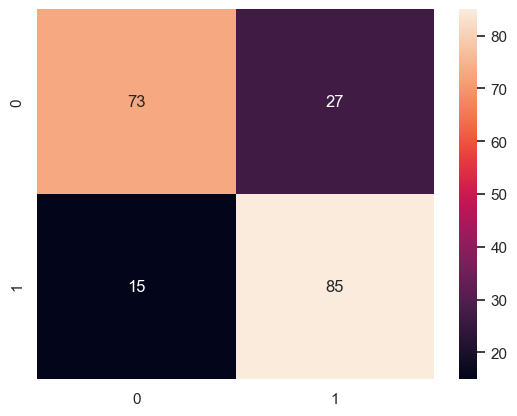

In [115]:
# rfc model with best params
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(**cv.best_params_)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
get_metrics(y_test, y_pred)

In [110]:
# check if model is overfitting
print('Train Accuracy')
print(rfc.score(x_train,y_train))
print('Test Accuracy')
print(rfc.score(x_test,y_test))

Train Accuracy
0.9625
Test Accuracy
0.8


Accuracy: 0.800
Recall: 0.775
Precision: 0.851
F1: 0.811
AxesSubplot(0.125,0.11;0.62x0.77)


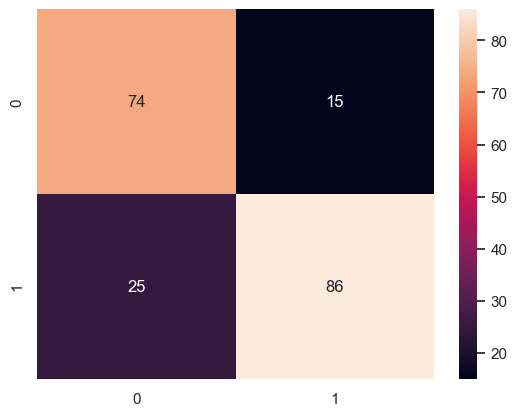

In [122]:
pipe = Pipeline([
    ('sc',StandardScaler()),
    ('rfc tuned',rfc),
])
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
get_metrics(y_pred,y_test)

In [123]:
# freeze the model in pickle
clf = open('rfc.pickle','wb')
pickle.dump(pipe,clf)
clf.close()

In [124]:
# check the model
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [127]:
import pickle
data = [[8, 183, 64, 23, 30.5, 23.3, 0.672, 32]]
clf = open('rfc.pickle','rb')
rfc = pickle.load(clf)
print(rfc.predict(data)[0])

1


In [155]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
st.title('Wee Deployment of Diabetes app')
st.subheader('Is the person diabetic or not?')
data = pd.read_csv('diabetes.csv')
st.set_option('deprecation.showPyplotGlobalUse', False)
if st.sidebar.checkbox('View Data',False):
    st.write(data)
if st.sidebar.checkbox('View Graph',False):
    data.hist()
    plt.tight_layout()
    st.pyplot()

# Load the pickle file
model = open('rfc.pickle','rb')
clf = pickle.load(model)
model.close()

# Get the front end user input
pregs = st.slider('Pregnancies',min(data['Pregnancies']),max(data['Pregnancies']),min(data['Pregnancies'])),
glucode = st.slider('Glucose',min(data['Glucose']),max(data['Glucose']),min(data['Glucose'])),
bp = st.slider('BloodPressure',data['BloodPressure'].min(),data['BloodPressure'].max(),data['BloodPressure'].min()),
skin = st.slider('SkinThickness',(min(data['SkinThickness'])),(max(data['SkinThickness'])),(min(data['SkinThickness']))),
insulin = st.slider('Insulin',min(data['Insulin']),max(data['Insulin']),min(data['Insulin'])),
bmi = st.slider('BMI',min(data['BMI']),max(data['BMI']),min(data['BMI'])),
diab = st.slider('DiabetesPedigreeFunction',min(data['DiabetesPedigreeFunction']),max(data['DiabetesPedigreeFunction']),min(data['DiabetesPedigreeFunction'])),
age = st.slider('Age',min(data['Age']),max(data['Age']),min(data['Age']))

# user input as model input
data = {
    'Pregnancies':pregs,
    'Glucose':glucode,
    'BloodPressure':bp,
    'SkinThickness':skin,
    'Insulin':insulin,
    'BMI':bmi,
    'DiabetesPedigreeFunction':diab,
    'Age':age
}

input_data = pd.DataFrame(data,index=[0])

# Predict the output
    
if st.button('Predict'):
    output = clf.predict(input_data)
    if output == 0:
        output = clf.predict(input_data)
    if output == 1:
        st.success('The person is diabetic')
    else:
        st.success('The person is not diabetic')


Overwriting app.py


In [153]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
